# Norms and Regularizers


## Basic terms
Distance: measures separation between two things   
Norm: measures distance to the origin, i.e. the length of a single vector  
Loss: a measure of distance between actual and predicted   
Regularization: prevents overfitting, sometimes by using a norm in the loss

Links:  
* MachineLearningMastery [Norms](https://machinelearningmastery.com/vector-norms-machine-learning/#:~:text=The%20L2%20norm%20calculates%20the,is%20a%20positive%20distance%20value.)

## L1 norm
L1 norm := Manhattan distance, point to origin, sum of abs of X & Y offsets.  
For 2D vector $v, L^1 norm == ||v||_1 == |x|+|y|$   
In python, use numpy.linalg.norm(v,1)

## L2 norm
L2 norm := Euclidian distance, point to origin, sqrt of sum of X & Y sqared.  
For 2D vector $v, L^2 norm = ||v||_2 = \sqrt(x^2 + y^2)$   
In python, use numpy.linalg.norm(v,2) or just norm(v)

## Lp norm
p-norm := generalization from L1 and L2 norms.   
For 2D vector $v, L^p norm = ||v||_p = (x^p + y^p)^{\frac{1}{p}}$   

## L-infinity norm
L-infinity norm := absolute value of X or Y, whichever is larger.  
For 2D vector $v, L^{\infty} norm = ||v||_{\infty} = max[abs(X),abs(y)]$   
In python, use numpy.linalg.norm(v,inf)


## Frobenious norm
For matrix M, norm = sum of squares of elements:   
$||M|| = \sqrt(\sum_{i,j} m_{i,j}^2)$   

For matrices M and N and their difference D=M-N,
the norm ||D|| is proportional to the RMSE(M,N).

## Distance
See our separate notebook devoted to this.   

Manhattan distance := point to point, sum of X and Y offsets, matches L1 norm

Euclidean distance := point to point, sqrt of sum of X and Y offsets, matches L2 norm   

Mahalanobis distance := point to distribution (e.g. multivariate gaussian) taking variance into account, deviation inverse times covariance times deviation     

## Loss
The model learns a function f().  
In training the model, we minimize loss L(f()).   
The simplest lost would be L = actual - predicted.

Loss functions: 
* zero-one loss: all or nothing
* hinge loss: no for error going under, linear error for going over
* mean absolute errror: similar to L1; shape is a V like two hinges
* mean squared error: similar to L2; shape is a parabola
* cross entropy: total entropy between actual distribution and predicted distribution; used when the model gives a score to each label and the scores sum to one; derived from the log likelihood and entropy formulas; shape has exponential drop off  

Formulas:   

Mean Square Error:   
$MSE = \frac{1}{n} \Sigma_{i=1}^n(y_i - \hat{y_i})^2$   
where n=#predictions, y are the actual values, y_hat are predictions.

Cross Entropy:   
$CE = H(P,Q) = -\Sigma_{x=1}^C(P(x) ln(Q(x)))$   
where P=truth, Q=prediction, C=#labels   
If P(x)=1 for one label and 0 for the others, then CE = -ln(score) for that label.    

## Regularization
Add something to the loss function to penalize model complexity and reduce overfitting.   
The model learns a function f().  
In training the model, we minimize loss = L(f()) + a * R(f),   
where R is a regularization function, and a is an importance coefficient.

Tikhonov regularization, which was the original, developed for least squares, adds this term to the loss:    
$\lambda ||w||_2^2$    
where lamda is a hyperparameter, 
w is the model's weight vector,
and the rest is the L2 norm squared.

L1 regularization:   
Add this to the loss: $\lambda \sum ||w_i||_1 = \lambda \sum |w_i|$    
L1 drops the less important variables by encouraging coefficient=zero.  
L1 algorithm: LASSO.   
Baysian interpretation: L1 is like using (pointy) Laplace distributions as priors. The coefficient for each feature is highly likely to be the mean of zero.    
Figure: Every point on the unit diamond has length=1 using the L1 norm. 
The larger diamond incorpotates a threshold t.
If we fit a classifier with an L1 constraint, 
the decision boundary is likely to intersect the diamond at a corner where X or Y is zero.

L2 regularization:   
Add this to the loss: $\lambda \sum ||w_i||_2 = \lambda \sum w_i^2$    
L2 encourages small coefficients for all variables.   
L2 algorithm: RIDGE.   
Baysian interpretation: L2 is like using (roundy) Gaussian distributions as priors. The coefficient for each feature is not as likely to be the mean of zero.   
Figure: Every point on the unit circle has length=1 using the L2 norm.
The larger circle incorpotates a threshold t.
If we fit a classifier with an L2 constraint, 
the decision boundary is likely to intersect the circle where X<t and Y<t.

Elastic net algorithm uses L1 and L2.

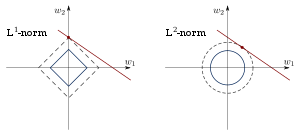
Above: The unit square (solid) and some larger threshold (dotted) for L1 and L2 norms.
A constraint has been set as t * L1 or t * L2 for threshold t.
A classifier converges on the decision boundary subject to the constraint (red).
With L1 regularization, some coefficients are likely zero.
With L2 regularization, all coefficients are likely small.
Source: [wikipedia](https://en.wikipedia.org/wiki/Lasso_(statistics))

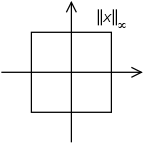
Above: The unit square (solid) for L-infinity norm.
A classifier (not shown) would be likely to converge on a solution at max X and max Y.

L-infinity norm would not work for regularization.
The classifier would be likely to maximize X and Y.

### More on regularization
Large values of lambda push the model to use tiny coefficients.
At the extreme, lambda is huge, and coefficients are zero.
That means the model predicts no change, 
or zero sensitivity to the inputs.
This is the opposite of overfitting!